In [76]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=03357120a9caa81064d2a01508c51960


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | grand gaube
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | khonuu
City not found. Skipping...
Processing Record 11 of Set 1 | deputatskiy
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | brigantine
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | pangai
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | savannah bight
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | sinnamary
Pr

Processing Record 37 of Set 4 | anloga
Processing Record 38 of Set 4 | pietrosani
Processing Record 39 of Set 4 | nishihara
Processing Record 40 of Set 4 | mengcheng
Processing Record 41 of Set 4 | honda
Processing Record 42 of Set 4 | holland
Processing Record 43 of Set 4 | ginda
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | clovis
Processing Record 46 of Set 4 | castro
Processing Record 47 of Set 4 | tooele
Processing Record 48 of Set 4 | marawi
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | brownfield
Processing Record 1 of Set 5 | gazanjyk
Processing Record 2 of Set 5 | lima
Processing Record 3 of Set 5 | khuzdar
Processing Record 4 of Set 5 | oranjemund
Processing Record 5 of Set 5 | bonthe
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | katsuura
Processing Record 9 of Set 5 | bonavista
Processing Record 10 of Set 5 | karauzyak
City no

Processing Record 26 of Set 8 | praia da vitoria
Processing Record 27 of Set 8 | monrovia
Processing Record 28 of Set 8 | inhambane
Processing Record 29 of Set 8 | mount isa
Processing Record 30 of Set 8 | pacific grove
Processing Record 31 of Set 8 | kenai
Processing Record 32 of Set 8 | longlac
City not found. Skipping...
Processing Record 33 of Set 8 | makung
City not found. Skipping...
Processing Record 34 of Set 8 | hopelchen
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | atar
Processing Record 37 of Set 8 | kisesa
Processing Record 38 of Set 8 | reconquista
Processing Record 39 of Set 8 | tlaxiaco
City not found. Skipping...
Processing Record 40 of Set 8 | westport
Processing Record 41 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 42 of Set 8 | kavaratti
Processing Record 43 of Set 8 | padang
Processing Record 44 of Set 8 | lavrentiya
Processing Record 45 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 46 of Set 8 

Processing Record 9 of Set 12 | sao joaquim
Processing Record 10 of Set 12 | komsomolskiy
Processing Record 11 of Set 12 | ximei
Processing Record 12 of Set 12 | kerrville
Processing Record 13 of Set 12 | kalianget
Processing Record 14 of Set 12 | evensk
Processing Record 15 of Set 12 | road town
Processing Record 16 of Set 12 | cervo
Processing Record 17 of Set 12 | abu zabad
Processing Record 18 of Set 12 | samarai
Processing Record 19 of Set 12 | mersing
Processing Record 20 of Set 12 | cabra
Processing Record 21 of Set 12 | vanderhoof
Processing Record 22 of Set 12 | birjand
Processing Record 23 of Set 12 | mareeba
Processing Record 24 of Set 12 | thinadhoo
Processing Record 25 of Set 12 | prince albert
Processing Record 26 of Set 12 | embu
Processing Record 27 of Set 12 | tabuk
Processing Record 28 of Set 12 | cap malheureux
Processing Record 29 of Set 12 | coihaique
Processing Record 30 of Set 12 | anadyr
Processing Record 31 of Set 12 | shakawe
Processing Record 32 of Set 12 | d

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,83.30,73,96,10.78,MV,2020-11-02 19:13:45
1,Saint-Philippe,-21.36,55.77,73.40,53,90,8.05,RE,2020-11-02 19:13:45
2,Hermanus,-34.42,19.23,64.99,82,1,8.99,ZA,2020-11-02 19:13:45
3,Grand Gaube,-20.01,57.66,69.01,69,1,3.00,MU,2020-11-02 19:13:45
4,Barrow,71.29,-156.79,28.40,74,90,16.11,US,2020-11-02 19:13:45
5,Kapaa,22.08,-159.32,75.00,94,75,9.08,US,2020-11-02 19:12:55
6,Atuona,-9.80,-139.03,77.52,76,19,20.04,PF,2020-11-02 19:13:45
7,Rikitea,-23.12,-134.97,72.25,81,9,20.24,PF,2020-11-02 19:13:45
8,Albany,42.60,-73.97,37.00,61,0,1.01,US,2020-11-02 19:10:06
9,Deputatskiy,69.30,139.90,-14.73,82,0,3.31,RU,2020-11-02 19:13:46


In [7]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2020-11-02 19:13:45,-0.60,73.08,83.30,73,96,10.78
1,Saint-Philippe,RE,2020-11-02 19:13:45,-21.36,55.77,73.40,53,90,8.05
2,Hermanus,ZA,2020-11-02 19:13:45,-34.42,19.23,64.99,82,1,8.99
3,Grand Gaube,MU,2020-11-02 19:13:45,-20.01,57.66,69.01,69,1,3.00
4,Barrow,US,2020-11-02 19:13:45,71.29,-156.79,28.40,74,90,16.11


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

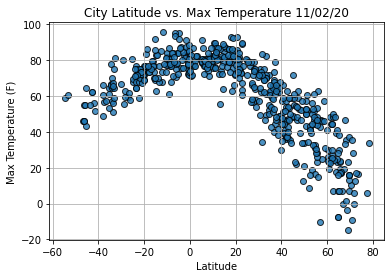

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

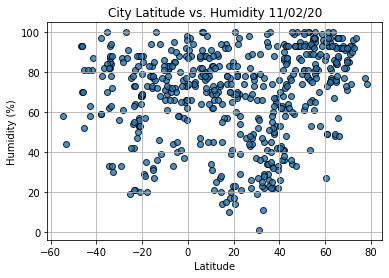

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

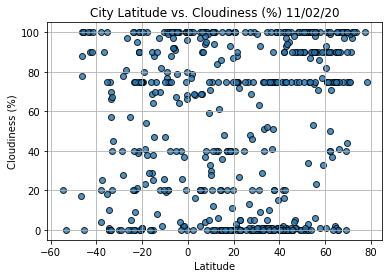

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

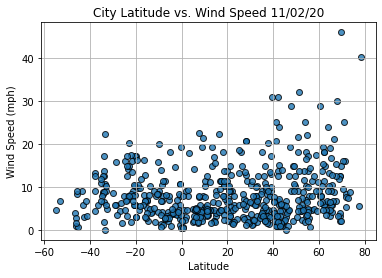

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [79]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [80]:
index13 = city_data_df.loc[13]
index13

City                       Pangai
Country                        TO
Date          2020-11-02 19:13:46
Lat                         -19.8
Lng                       -174.35
Max Temp                     75.2
Humidity                       88
Cloudiness                     75
Wind Speed                  17.22
Name: 13, dtype: object

In [81]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Barrow,US,2020-11-02 19:13:45,71.29,-156.79,28.40,74,90,16.11
5,Kapaa,US,2020-11-02 19:12:55,22.08,-159.32,75.00,94,75,9.08
8,Albany,US,2020-11-02 19:10:06,42.60,-73.97,37.00,61,0,1.01
9,Deputatskiy,RU,2020-11-02 19:13:46,69.30,139.90,-14.73,82,0,3.31
11,Brigantine,US,2020-11-02 19:13:46,39.41,-74.36,46.99,33,1,31.09


In [82]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

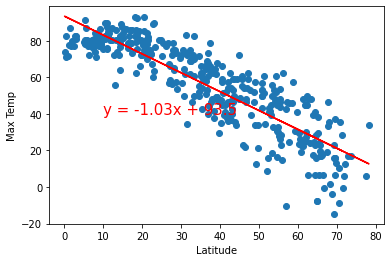

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

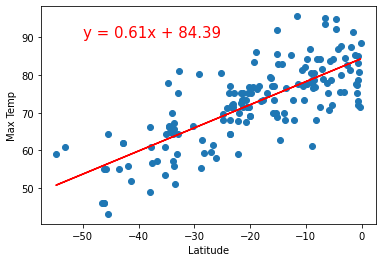

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

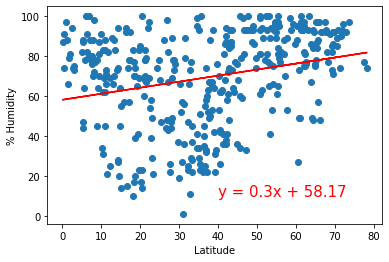

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

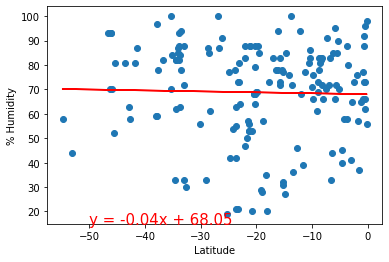

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

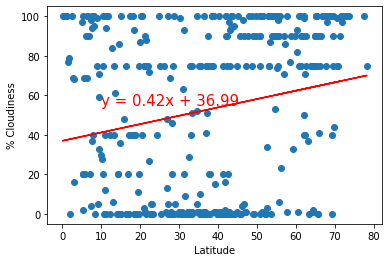

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n'
                    'for % Cloudiness', '% Cloudiness',(10,55))

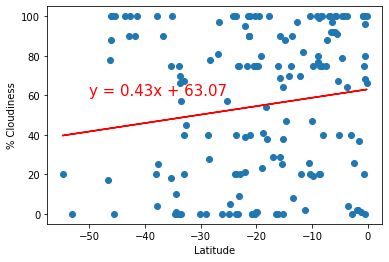

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

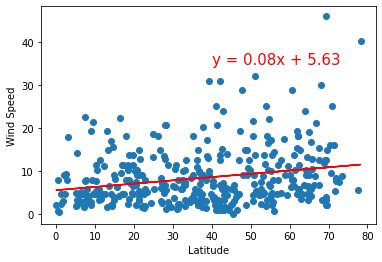

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

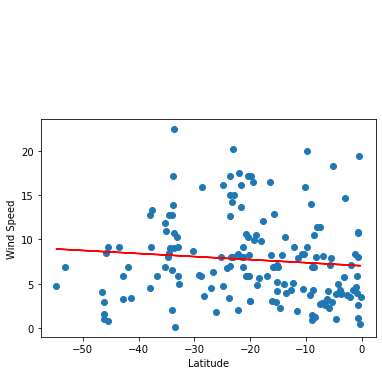

In [109]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))